## Task-3: Data Cleaning and Preprocessing
select a dataset with missing values and outliers. Apply techniques to clean and preprocess the data using Pandas. Impute missing values and handle outliers appropriately.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = r"E:\EduNexa Tech Datasets\tested.csv"
data = pd.read_csv(file_path)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data = data[['Survived','Name','Sex','Age']]
data

,Survived,Name,Sex,Age
0,0,"Kelly, Mr. James",male,34.5
1,1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0
2,0,"Myles, Mr. Thomas Francis",male,62.0
3,0,"Wirz, Mr. Albert",male,27.0
4,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0
...,...,...,...,...
413,0,"Spector, Mr. Woolf",male,NaN
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0
415,0,"Saether, Mr. Simon Sivertsen",male,38.5
416,0,"Ware, Mr. Frederick",male,NaN


## Finding missing values

In [7]:
data.isnull().sum()

Survived     0
Name         0
Sex          0
Age         86
dtype: int64

In [8]:
data.dtypes

Survived      int64
Name         object
Sex          object
Age         float64
dtype: object

## Inserting average age in the missing values in the column 'Age'

In [9]:
avg_age = data['Age'].mean()
avg_age

30.272590361445783

In [13]:
missing_rows = data['Age'].isnull()
data.loc[missing_rows, 'Age'] = avg_age

In [14]:
data.isna().sum()

Survived    0
Name        0
Sex         0
Age         0
dtype: int64

In [16]:
data

,Survived,Name,Sex,Age
0,0,"Kelly, Mr. James",male,34
1,1,"Wilkes, Mrs. James (Ellen Needs)",female,47
2,0,"Myles, Mr. Thomas Francis",male,62
3,0,"Wirz, Mr. Albert",male,27
4,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22
...,...,...,...,...
413,0,"Spector, Mr. Woolf",male,27
414,1,"Oliva y Ocana, Dona. Fermina",female,39
415,0,"Saether, Mr. Simon Sivertsen",male,38
416,0,"Ware, Mr. Frederick",male,27


## finding outliers

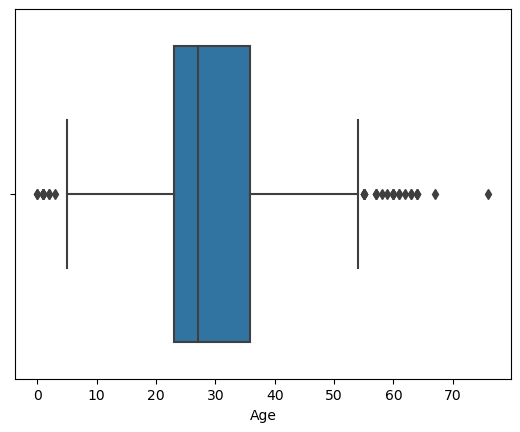

In [17]:
sns.boxplot(x= data['Age'])
plt.show()